# Project: Investigate a Dataset (TMDB MOVIE)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In this analysis i choose imdb movie data which contains data of 10865 movies with thier id, imdb_id, popularity, budget	,revenue, original title, cast, homepage, director, tagline,overview,runtime,genres,production_companies,release_date,	vote_count,vote_average,release_year,budget_adj and	revenue_adj.
>In this analyis i will try to answer the follwing question
<p>Q1)Which directors has the highest profit.</p>
<p>Q2)Top 10 genres according to votes.</p>
<p>Q3)Which genre has heighest number of movie released.</p>
<p>Q4)COMPARISION BETWEEN  THE RATINGS OF PROFITABLE MOVIES AND NON-PROFITABLE MOVIES</p>
<p>Q5) Which year has heighest number of movie released</p>
<p>Q6)what is the co-relation between budget and revenue </p>
<p>Q7)Relation Between Popularty and release year </p>

In [86]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.


### General Properties

In [87]:
df=df=pd.read_csv('tmdb-movies.csv')

In [88]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<h5>Check for duplicates and removing duplicates</h5>

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [90]:
sum(df.duplicated())

1

Only one duplicate so we can remove it 

In [91]:
df.drop_duplicates(inplace=True)


In [92]:
sum(df.duplicated())

0

<h4>Removing unwanted columns</h4>

In [93]:
df.drop(['homepage', 'cast', 'tagline', 'overview'],axis =1 ,inplace=True)

In [94]:
df.head(1)


,id,imdb_id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.5+ MB


NOW we remove keywords and production compines as this contains a lot of null values 

In [95]:
df.drop(['production_companies','keywords'],axis=1,inplace=True)

In [96]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<p3> Now we remove NULL values</p3>

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
id                10865 non-null int64
imdb_id           10855 non-null object
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


In [98]:
df.dropna(inplace=True)

In [99]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10795 entries, 0 to 10865
Data columns (total 15 columns):
id                10795 non-null int64
imdb_id           10795 non-null object
popularity        10795 non-null float64
budget            10795 non-null int64
revenue           10795 non-null int64
original_title    10795 non-null object
director          10795 non-null object
runtime           10795 non-null int64
genres            10795 non-null object
release_date      10795 non-null object
vote_count        10795 non-null int64
vote_average      10795 non-null float64
release_year      10795 non-null int64
budget_adj        10795 non-null float64
revenue_adj       10795 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


In [100]:
df.dtypes

id                  int64
imdb_id            object
popularity        float64
budget              int64
revenue             int64
original_title     object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

Changing data type of release_date from object to datetime 

In [54]:
df['release_date'] = pd.to_datetime(df['release_date'])

Converting budget_adj and revenue_adj to int 

In [ ]:
#function to convert budget_adj and revenue_adj to int 
def dt (y):
    df[y]=df[y].astype(int)

In [59]:
dt('budget_adj')
dt('revenue_adj')

#### Checking 

In [60]:
df.dtypes

id                         int64
imdb_id                   object
popularity               float64
budget                     int64
revenue                    int64
original_title            object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj                 int64
revenue_adj                int64
dtype: object

In [17]:
df.shape

(10795, 15)

<a id='eda'></a>
## Exploratory Data Analysis


## Q1)  Which director has the highest profit

In [101]:
df['profit']=df['revenue'] - df['budget']

In [102]:
df['profit'].head(5)

0    1363528810
1     228436354
2     185238201
3    1868178225
4    1316249360
Name: profit, dtype: int64

In [103]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810


Now we have profit column aslo

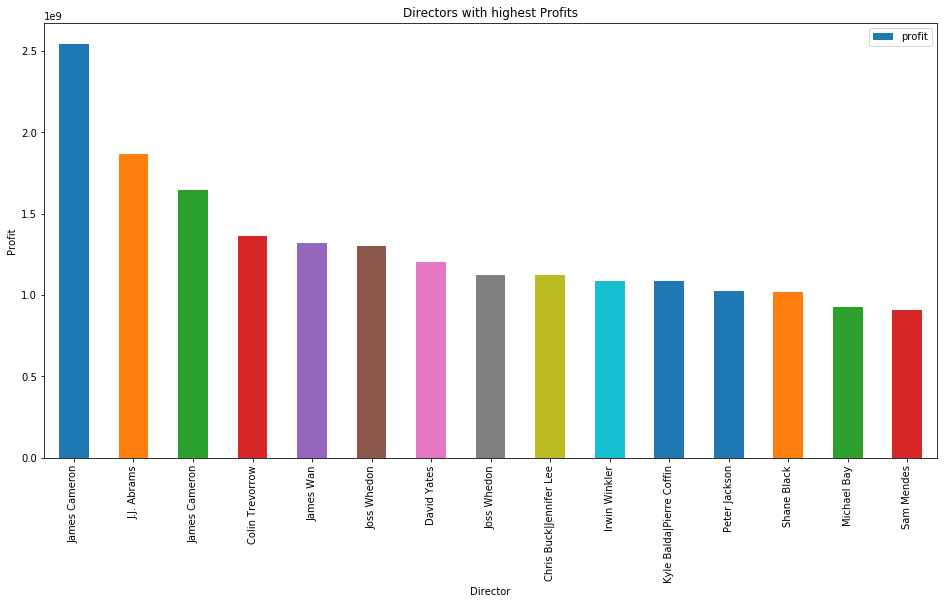

In [104]:

pro  = pd.DataFrame(df[['director', 'profit']].sort_values(by = 'profit', ascending = False))


gp1=pro[:15].plot(x ='director', y ='profit', kind = 'bar', figsize = (16,8) )
gp1.set_xlabel("Director")
gp1.set_ylabel("Profit")
gp1.set_title("Directors with highest Profits");

### Q2) Top 10 genres according to votes

In [105]:
df_gen1 = df.groupby(['genres'],as_index=False)[['vote_average']].mean().sort_values(by=['vote_average'],ascending=False)[:10]

In [106]:
df_gen1

,genres,vote_average
1149,Drama|Horror|Mystery|Science Fiction|Thriller,8.8
1589,Music|Drama|Fantasy|Romance,8.4
1907,Thriller|Documentary,8.2
1468,History|Drama|Thriller|War,8.0
1398,Fantasy|Drama|Crime,8.0
1666,Romance|Comedy|Animation|Drama|Family,8.0
1614,Mystery|Documentary|Crime,8.0
1353,Fantasy|Animation|Comedy|Drama,7.9
637,Animation|Drama|Fantasy,7.9
1743,Science Fiction|Adventure|Drama|Fantasy,7.9


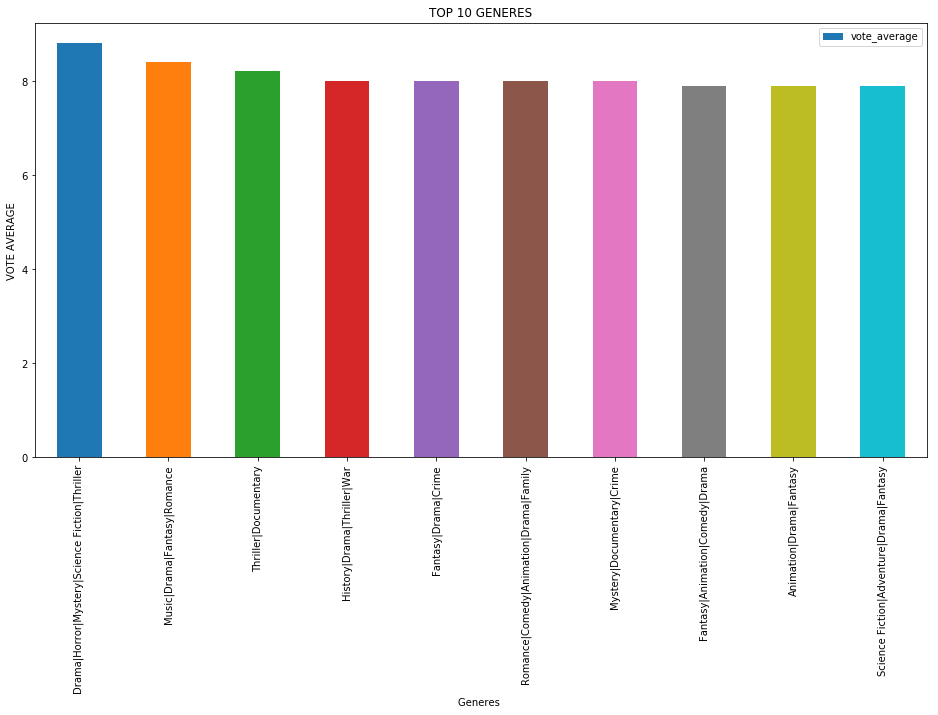

In [107]:
gp2=df_gen1[:10].plot(x ='genres', y ='vote_average', kind = 'bar', figsize = (16,8) )
gp2.set_xlabel("Generes ")
gp2.set_ylabel("VOTE AVERAGE")
gp2.set_title("TOP 10 GENERES"); 

### Q3) Which genre has heighest number of movie released

In [108]:
df2=df.groupby(['genres'])['id'].count().sort_values(ascending=False)[:10]


In [109]:
df2[:10]

genres
Drama                   711
Comedy                  707
Documentary             306
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          267
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Name: id, dtype: int64

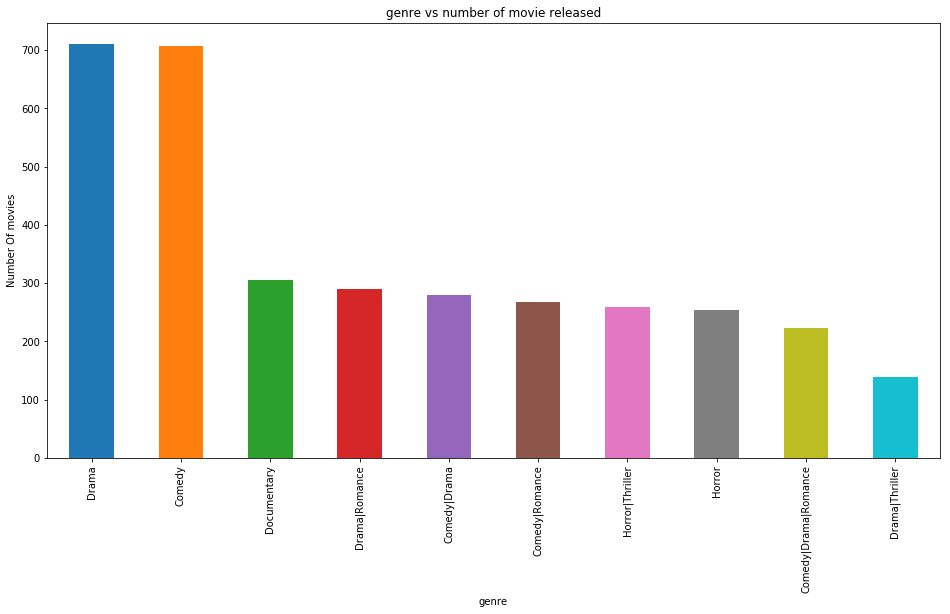

In [110]:
ya=df2[:10].plot(kind = 'bar', figsize = (16,8) )
ya.set_xlabel("genre")
ya.set_ylabel("Number Of movies")
ya.set_title("genre vs number of movie released");

### Q4) COMPARISION BETWEEN  THE RATINGS OF PROFITABLE MOVIES AND NON-PROFITABLE MOVIES

In [111]:
hit=df.query('profit>0')
flop=df.query('profit<0')

In [112]:
avg_votes_high=hit['vote_average'].mean()

In [113]:
avg_votes_high

6.2358430540827143

In [114]:
avg_votes_flop=flop['vote_average'].mean()

In [115]:
avg_votes_flop

5.7283795130142741

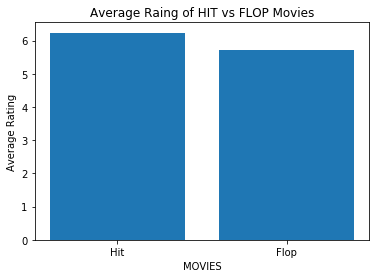

In [116]:
locations = [1, 2]
heights = [avg_votes_high, avg_votes_flop]
labels = ['Hit', 'Flop']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Raing of HIT vs FLOP Movies')
plt.xlabel('MOVIES')
plt.ylabel('Average Rating');

#### as we can clearly see movies which are profitable has good rating as compared to flop movies

### Q5) Which year has heighest number of movie released

In [117]:
data = df.groupby('release_year').count()['id']
data

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     39
1968     39
1969     31
1970     40
1971     55
1972     40
1973     55
1974     46
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    108
1986    121
1987    125
1988    144
1989    136
1990    132
1991    133
1992    133
1993    177
1994    184
1995    174
1996    203
1997    191
1998    210
1999    224
2000    226
2001    241
2002    266
2003    281
2004    307
2005    363
2006    408
2007    433
2008    488
2009    526
2010    479
2011    539
2012    581
2013    651
2014    694
2015    624
Name: id, dtype: int64

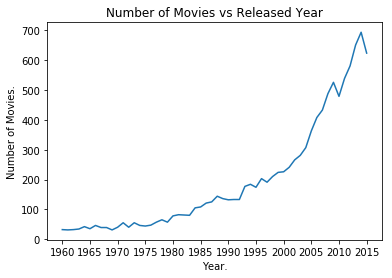

In [118]:
plt.xticks(np.arange(1960,2020,5))
plt.xlabel("Year.")
plt.ylabel("Number of Movies.")
plt.title("Number of Movies vs Released Year")
plt.plot(data)
plt.show()

#### 2014 has highest number of movie released ie 694

###  Q6)what is the co-relation between budget and revenue

Co-relation :  (0.73469560455059657, 0.0)


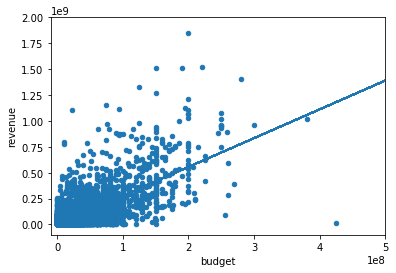

In [119]:
import statsmodels.api as sm
import scipy

# regress 'expression' onto 'motifscore' (plus an intercept)

model = sm.OLS(df.revenue, sm.add_constant(df.budget))
p = model.fit().params

# genrate x value for regression line
x= df.revenue
# scatter plot data
ax= df.plot(x = 'budget', y= 'revenue', kind = 'scatter')

# plot regression line on the axis set x axis limit
ax.plot(x, p.const + p.budget *x)
ax.set_xlim([-10000000, 500000000])
ax.set_ylim([-100000000, 2000000000])

print("Co-relation : ", scipy.stats.pearsonr(df.budget, df.revenue))

#### The co-relation between budget and revenue are (0.7349279812889291, 0.0). 

### Q6) Relation Between Popularty and release year

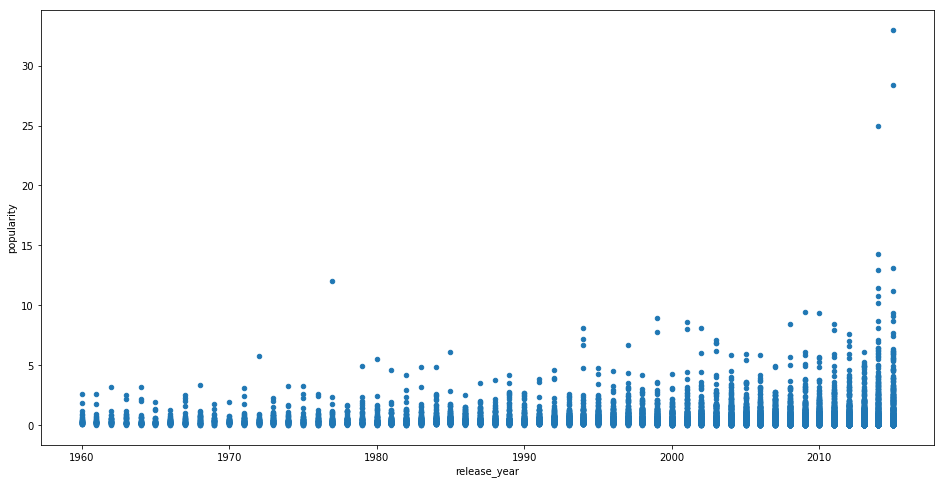

In [120]:
df.plot(x='release_year',y='popularity',kind='scatter',figsize=(16,8));

#### After the year 2010 the popularty of movies has increased


<a id='conclusions'></a>
## Conclusions

<p> Director james Cameron has heighest profit margin(2544505847).</p>
<p>Drama|Horror|Mystery|Science Fiction|Thriller	is the most rated genres with average rating of 8.8</p> 
<p>Comedy genre has heighest number of movie released i.e. 292 followed by comedy and documentry.</p>
<p>Profitable movies has better rating(6.23), as compared to non-profitable movies(5.7) .</p>
<p>In year 2014 max number of movie is released i.e. 700 and In year 1961 and 1969 lowest number of movie is released i.e. 31</p>
<p>The co-relation between budget and revenue are (0.7349279812889291, 0.0)</p>
<p>After the year 2010 the popularty of movies has increased</p>

## Limitations

<p>1)There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.</p
<p>2)Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. </p>


In [121]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])


0